## Лабораторная работа №4

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../data/lab4/DataBikes_new.csv")
df = df.drop(columns=["Unnamed: 0"])
display(df)
df.info()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental count,score,score_type,Temperature Category
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,257,56.0,0-100,frost
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,219,3.0,0-10,frost
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,162,7.0,0-10,frost
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,148,8.0,0-10,frost
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,97,10.0,0-100,frost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,644,55.0,0-100,cold
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,359,10.0,0-100,cold
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,1236,8.0,0-10,cold
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,628,8.0,0-10,cold


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   object 
 9   Functioning Day       8760 non-null   object 
 10  Rental count          8760 non-null   int64  
 11  score                 8760 non-null   float64
 12  score_type            8760 non-null   object 
 13  Temperature Category  8581 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 958.3+ KB


1. Функция describe()

In [14]:
df.describe()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental count,score,score_type,Temperature Category
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,257,56.0,0-100,frost
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,219,3.0,0-10,frost
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,162,7.0,0-10,frost
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,148,8.0,0-10,frost
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,97,10.0,0-100,frost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,644,55.0,0-100,cold
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,359,10.0,0-100,cold
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,1236,8.0,0-10,cold
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,628,8.0,0-10,cold


2. Средняя, медианная и модовая температуры; дисперсия, среднеквадратичное отклонение, размах и интерквартильный размах для каждого сезона

In [12]:
seasons_temperature = df.groupby('Seasons')['Temperature']
mean_temperature = seasons_temperature.mean()
median_temperature = seasons_temperature.median()
mode_temperature = seasons_temperature.apply(lambda x: x.mode().tolist())

var_temperature = seasons_temperature.var()
std_temperature = seasons_temperature.std()
dif_temperature = seasons_temperature.apply(lambda x: abs(x.max() - x.min()))
quantile_dif_temperature = seasons_temperature.quantile(0.75) - seasons_temperature.quantile(0.25)

distribution_df = pd.DataFrame()

distribution_df['Средняя температура'] = mean_temperature
distribution_df['Медианная температура'] = median_temperature
distribution_df['Модовая температура'] = mode_temperature
distribution_df['Дисперсия'] = var_temperature
distribution_df['Среднеквадратичное отклонение'] = std_temperature
distribution_df['Размах'] = dif_temperature
distribution_df['Интерквартильный размах'] = quantile_dif_temperature
distribution_df = distribution_df
distribution_df

,Средняя температура,Медианная температура,Модовая температура,Дисперсия,Среднеквадратичное отклонение,Размах,Интерквартильный размах
Seasons,,,,,,,
Autumn,14.138821,13.8,"[10.8, 16.6]",49.589573,7.041986,33.5,11.1
Spring,13.038533,13.3,[9.6],43.665630,6.607997,36.0,9.9
Summer,26.574827,26.6,"[23.4, 24.2, 24.6]",21.655814,4.653581,23.1,6.7
Winter,-2.567783,-2.2,"[-1.8, -1.3]",29.877730,5.466052,28.1,7.7


3. Замена None значений в переменной 'Temperature'. Разница числовых характеристик среднего и разброса после замены

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Week'] = df['Date'].dt.isocalendar().week

df['Temperature'] = df['Temperature'].fillna(df.groupby(['Week', 'Hour'])['Temperature'].transform('mean'))

new_seasons_temperature = df.groupby('Seasons')['Temperature']
new_mean_temperature = new_seasons_temperature.mean()
new_median_temperature = new_seasons_temperature.median()
new_mode_temperature = new_seasons_temperature.apply(lambda x: x.mode().tolist())
new_var_temperature = new_seasons_temperature.var()
new_std_temperature = new_seasons_temperature.std()
new_dif_temperature = new_seasons_temperature.apply(lambda x: abs(x.max() - x.min()))
new_quantile_dif_temperature = new_seasons_temperature.quantile(0.75) - new_seasons_temperature.quantile(0.25)

new_distribution_df = pd.DataFrame()

new_distribution_df['Средняя температура'] = new_mean_temperature
new_distribution_df['Медианная температура'] = new_median_temperature
new_distribution_df['Модовая температура'] = new_mode_temperature
new_distribution_df['Дисперсия'] = new_var_temperature
new_distribution_df['Среднеквадратичное отклонение'] = new_std_temperature
new_distribution_df['Размах'] = new_dif_temperature
new_distribution_df['Интерквартильный размах'] = new_quantile_dif_temperature
display(new_distribution_df)

dif_distribution_df = pd.DataFrame()
dif_distribution_df['Средняя температура'] = abs(new_mean_temperature - mean_temperature)
dif_distribution_df['Медианная температура'] = abs(new_median_temperature - median_temperature)
dif_distribution_df['Модовая температура'] = new_mode_temperature
dif_distribution_df['Дисперсия'] = abs(new_var_temperature - var_temperature)
dif_distribution_df['Среднеквадратичное отклонение'] = abs(new_std_temperature - std_temperature)
dif_distribution_df['Размах'] = abs(new_dif_temperature - dif_temperature)
dif_distribution_df['Интерквартильный размах'] = abs(new_quantile_dif_temperature - quantile_dif_temperature)
display(dif_distribution_df)

,Средняя температура,Медианная температура,Модовая температура,Дисперсия,Среднеквадратичное отклонение,Размах,Интерквартильный размах
Seasons,,,,,,,
Autumn,14.109791,13.8,"[10.8, 16.6]",49.846580,7.060211,33.5,11.2
Spring,13.054226,13.3,[9.6],43.403266,6.588116,36.0,9.7
Summer,26.578191,26.6,"[23.4, 24.2, 24.6]",21.621408,4.649883,23.1,6.7
Winter,-2.547833,-2.2,"[-1.8, -1.3]",29.766521,5.455870,28.1,7.6


,Средняя температура,Медианная температура,Модовая температура,Дисперсия,Среднеквадратичное отклонение,Размах,Интерквартильный размах
Seasons,,,,,,,
Autumn,0.029030,0.0,"[10.8, 16.6]",0.257006,0.018225,0.0,0.1
Spring,0.015693,0.0,[9.6],0.262364,0.019882,0.0,0.2
Summer,0.003364,0.0,"[23.4, 24.2, 24.6]",0.034406,0.003698,0.0,0.0
Winter,0.019950,0.0,"[-1.8, -1.3]",0.111209,0.010182,0.0,0.1


4. Таблица без выбросов. Разница числовых характеристик среднего и разброса после изменений.

In [6]:
without_outliers_df = df.merge(new_distribution_df[['Средняя температура', 'Среднеквадратичное отклонение']], on='Seasons')
without_outliers_df['Temperature diff'] = abs(without_outliers_df['Temperature'] - without_outliers_df['Средняя температура'])
without_outliers_df = without_outliers_df[without_outliers_df['Temperature diff'] < 2 * without_outliers_df['Среднеквадратичное отклонение']]
display(without_outliers_df)

without_outliers_temperature_df = without_outliers_df.groupby('Seasons')['Temperature']
without_outliers_mean_temperature = without_outliers_temperature_df.mean()
without_outliers_median_temperature = without_outliers_temperature_df.median()
without_outliers_mode_temperature = without_outliers_temperature_df.apply(lambda x: x.mode().tolist())

without_outliers_var_temperature = without_outliers_temperature_df.var()
without_outliers_std_temperature = without_outliers_temperature_df.std()
without_outliers_dif_temperature = without_outliers_temperature_df.apply(lambda x: abs(x.max() - x.min()))
without_outliers_quantile_dif_temperature = without_outliers_temperature_df.quantile(0.75) - without_outliers_temperature_df.quantile(0.25)

without_outliers_distribution_df = pd.DataFrame()

without_outliers_distribution_df['Средняя температура'] = without_outliers_mean_temperature
without_outliers_distribution_df['Медианная температура'] = without_outliers_median_temperature
without_outliers_distribution_df['Модовая температура'] = without_outliers_mode_temperature
without_outliers_distribution_df['Дисперсия'] = without_outliers_var_temperature
without_outliers_distribution_df['Среднеквадратичное отклонение'] = without_outliers_std_temperature
without_outliers_distribution_df['Размах'] = without_outliers_dif_temperature
without_outliers_distribution_df['Интерквартильный размах'] = without_outliers_quantile_dif_temperature
display(without_outliers_distribution_df)

without_outliers_dif_distribution_df = pd.DataFrame()
without_outliers_dif_distribution_df['Средняя температура'] = abs(without_outliers_mean_temperature - mean_temperature)
without_outliers_dif_distribution_df['Медианная температура'] = abs(without_outliers_median_temperature - median_temperature)
without_outliers_dif_distribution_df['Модовая температура'] = without_outliers_mode_temperature
without_outliers_dif_distribution_df['Дисперсия'] = abs(without_outliers_var_temperature - var_temperature)
without_outliers_dif_distribution_df['Среднеквадратичное отклонение'] = abs(without_outliers_std_temperature - std_temperature)
without_outliers_dif_distribution_df['Размах'] = abs(without_outliers_dif_temperature - dif_temperature)
without_outliers_dif_distribution_df['Интерквартильный размах'] = abs(without_outliers_quantile_dif_temperature - quantile_dif_temperature)
display(without_outliers_dif_distribution_df)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental count,score,score_type,Temperature Category,Средняя температура,Среднеквадратичное отклонение,Temperature diff
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,257,56.0,0-100,frost,-2.564298,5.424691,2.635702
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,219,3.0,0-10,frost,-2.564298,5.424691,2.935702
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,162,7.0,0-10,frost,-2.564298,5.424691,3.435702
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,148,8.0,0-10,frost,-2.564298,5.424691,3.635702
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,97,10.0,0-100,frost,-2.564298,5.424691,3.435702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,644,55.0,0-100,cold,14.129385,6.978515,9.929385
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,359,10.0,0-100,cold,14.129385,6.978515,10.729385
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,1236,8.0,0-10,cold,14.129385,6.978515,11.529385
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,628,8.0,0-10,cold,14.129385,6.978515,12.029385


,Средняя температура,Медианная температура,Модовая температура,Дисперсия,Среднеквадратичное отклонение,Размах,Интерквартильный размах
Seasons,,,,,,,
Autumn,14.167944,13.8,"[10.8, 16.6]",45.556735,6.749573,27.8,10.6
Spring,13.036516,13.3,[9.6],38.417488,6.198184,25.9,9.5
Summer,26.361835,26.4,"[23.4, 24.2, 24.6]",18.845400,4.341129,18.4,6.3
Winter,-2.185802,-2.0,"[-1.8, -1.3]",24.245892,4.924012,21.5,7.2


,Средняя температура,Медианная температура,Модовая температура,Дисперсия,Среднеквадратичное отклонение,Размах,Интерквартильный размах
Seasons,,,,,,,
Autumn,0.029123,0.0,"[10.8, 16.6]",4.032838,0.292413,5.7,0.5
Spring,0.002017,0.0,[9.6],5.248142,0.409813,10.1,0.4
Summer,0.212992,0.2,"[23.4, 24.2, 24.6]",2.810415,0.312452,4.7,0.4
Winter,0.381981,0.2,"[-1.8, -1.3]",5.631838,0.542041,6.6,0.5


5. График размахов температур для каждого месяца

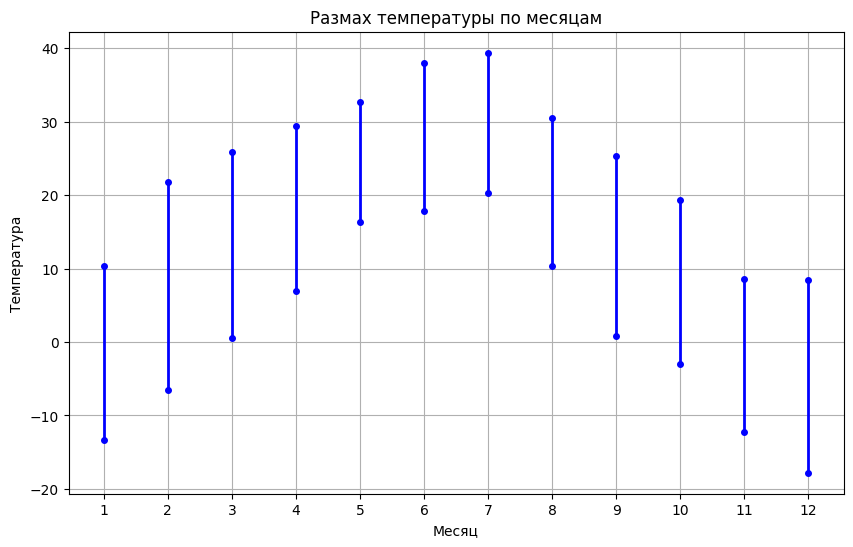

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
month_temperature = df.groupby('Month')['Temperature']

month_max_temperature = month_temperature.max().tolist()
month_min_temperature = month_temperature.min().tolist()
month = df['Month'].unique().tolist()

plt.figure(figsize=(10, 6))
plt.title('Размах температуры по месяцам')
plt.plot([month, month], [month_min_temperature, month_max_temperature], 'b-o', linewidth=2, markersize=4)
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.grid(True)
plt.xticks(month)
plt.show()

6. z-стандартизация. Количество дней, когда работа проката по оценкам была выше среднего.

In [8]:
scale_rating = df.groupby('score_type')['score']
scale_rating_mean = scale_rating.mean()
scale_rating_std = scale_rating.std()

stats = pd.DataFrame()
stats['score_mean'] = scale_rating_mean
stats['score_std'] = scale_rating_std

z_df = df.merge(stats, on='score_type')

z_df['z-standardization'] = (z_df['score'] - z_df['score_mean']) / z_df['score_std']
display(z_df)

days_count = z_df[z_df['z-standardization'] > 0].shape[0]
print(f"Количество дней, когда работа проката по оценкам была выше среднего - {days_count}")

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental count,score,score_type,Temperature Category,Month,score_mean,score_std,z-standardization
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,257,56.0,0-100,frost,12,44.552083,32.218213,0.355324
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,219,3.0,0-10,frost,12,6.788667,2.571681,-1.473226
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,162,7.0,0-10,frost,12,6.788667,2.571681,0.082177
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,148,8.0,0-10,frost,12,6.788667,2.571681,0.471028
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,97,10.0,0-100,frost,12,44.552083,32.218213,-1.072439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,644,55.0,0-100,cold,11,44.552083,32.218213,0.324286
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,359,10.0,0-100,cold,11,44.552083,32.218213,-1.072439
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,1236,8.0,0-10,cold,11,6.788667,2.571681,0.471028
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,628,8.0,0-10,cold,11,6.788667,2.571681,0.471028


Количество дней, когда работа проката по оценкам была выше среднего - 4619


7. Линейная зависимость между температурой и числом арендованных велосипедов (год, сезон, месяц). График рассеяния для данных, имеющих максимальную линейную зависимость

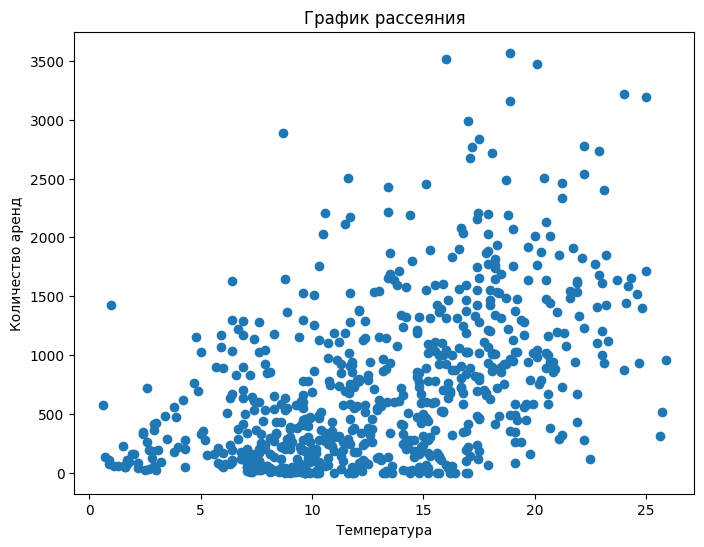

In [9]:
df['Year'] = df['Date'].dt.year

year_temperature_corr = df.groupby('Year')['Temperature'].corr(df['Rental count'])

season_temperature_corr = df.groupby('Seasons')['Temperature'].corr(df['Rental count'])

month_temperature_corr = df.groupby('Month')['Temperature'].corr(df['Rental count'])

# Максимальная линейная зависимость: Месяц 4 0.503106

max_corr = month_temperature_corr.max()
max_month = month_temperature_corr.idxmax()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['Month'] == max_month]['Temperature'], df[df['Month'] == max_month]['Rental count'])
plt.xlabel('Температура')
plt.ylabel('Количество аренд')
plt.title('График рассеяния')
plt.show()

8. Линейная зависимость между температурой и оценкой (год, сезон, месяц). График рассеяния для данных, имеющих максимальную линейную зависимость

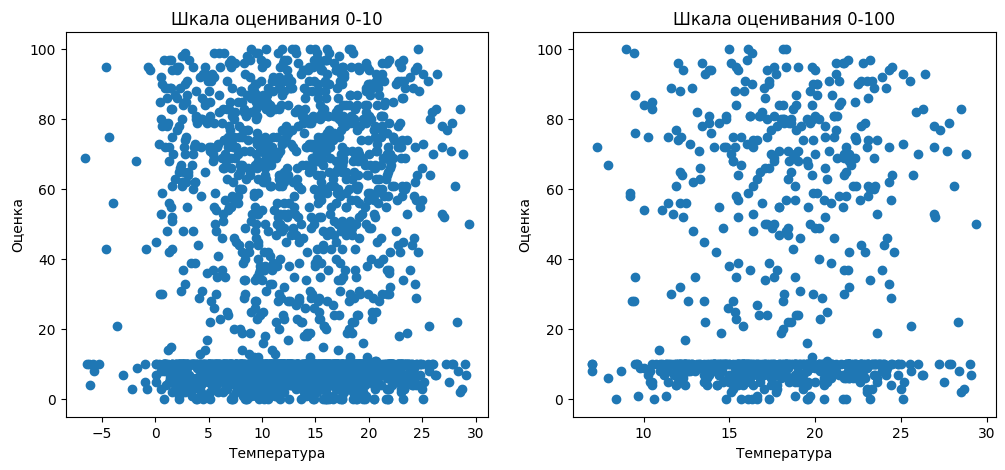

In [10]:
ten_point_scale_df = df[df['score_type'] == '0-10']
hundred_point_scale_df = df[df['score_type'] == '0-100']

year_ten_point_scale_corr = ten_point_scale_df.groupby('Year')['Temperature'].corr(ten_point_scale_df['score'])
season_ten_point_scale_corr = ten_point_scale_df.groupby('Seasons')['Temperature'].corr(ten_point_scale_df['score'])
month_ten_point_scale_corr = ten_point_scale_df.groupby('Month')['Temperature'].corr(ten_point_scale_df['score'])

# Максимальная линейная зависимость: Spring 0.096127

max_ten_point_scale_corr = season_ten_point_scale_corr.max()
max_ten_point_scale_season = season_ten_point_scale_corr.idxmax()

year_hundred_point_scale_corr = hundred_point_scale_df.groupby('Year')['Temperature'].corr(hundred_point_scale_df['score'])
season_hundred_point_scale_corr = hundred_point_scale_df.groupby('Seasons')['Temperature'].corr(hundred_point_scale_df['score'])
month_hundred_point_scale_corr = hundred_point_scale_df.groupby('Month')['Temperature'].corr(hundred_point_scale_df['score'])

# Максимальная линейная зависимость: Месяц 5 0.076585

max_hundred_point_scale_corr = month_hundred_point_scale_corr.max()
max_hundred_point_scale_month = month_hundred_point_scale_corr.idxmax()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df[df['Seasons'] == max_ten_point_scale_season]['Temperature'], df[df['Seasons'] == max_ten_point_scale_season]['score'])
plt.xlabel('Температура')
plt.ylabel('Оценка')
plt.title('Шкала оценивания 0-10')

plt.subplot(1, 2, 2)
plt.scatter(df[df['Month'] == max_hundred_point_scale_month]['Temperature'], df[df['Month'] == max_hundred_point_scale_month]['score'])
plt.xlabel('Температура')
plt.ylabel('Оценка')
plt.title('Шкала оценивания 0-100')

plt.show()